In [ ]:
!pip install wordcloud

            Metric        Value
0    Total Reviews  2972.000000
1  Unique Products   148.000000
2     Unique Users   458.000000
3   Average Rating     4.885262


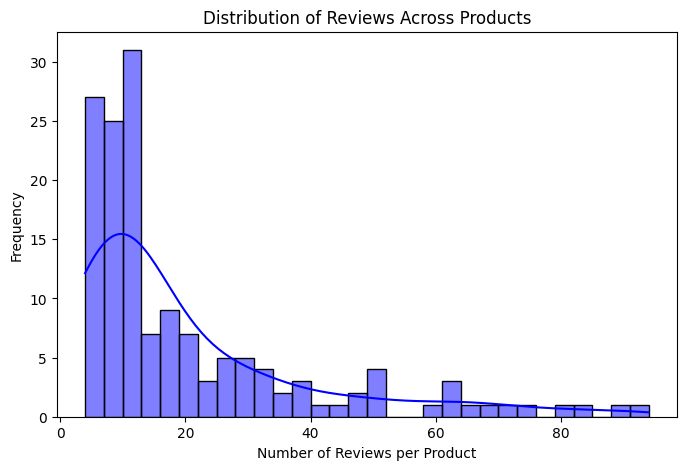

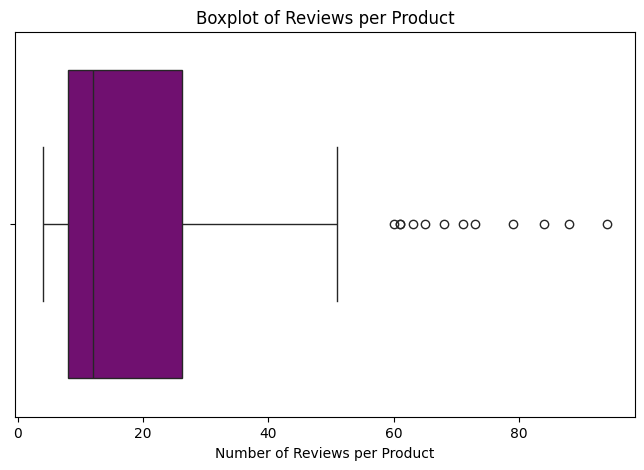

<Figure size 100x100 with 0 Axes>

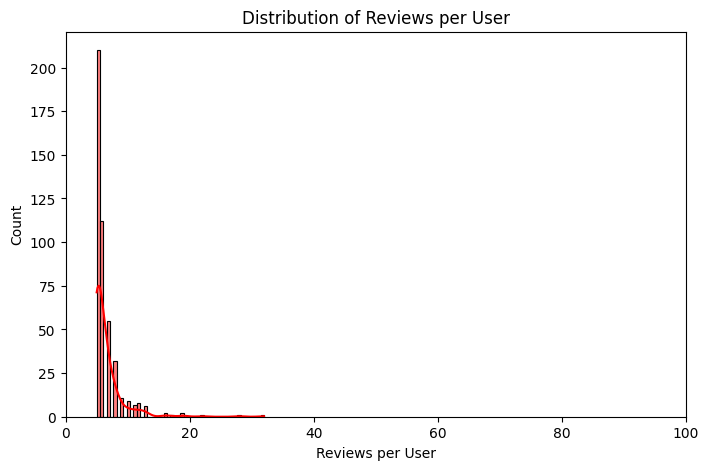

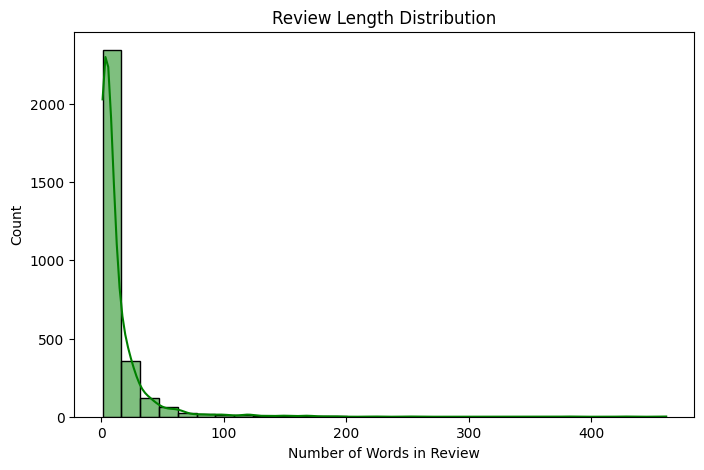

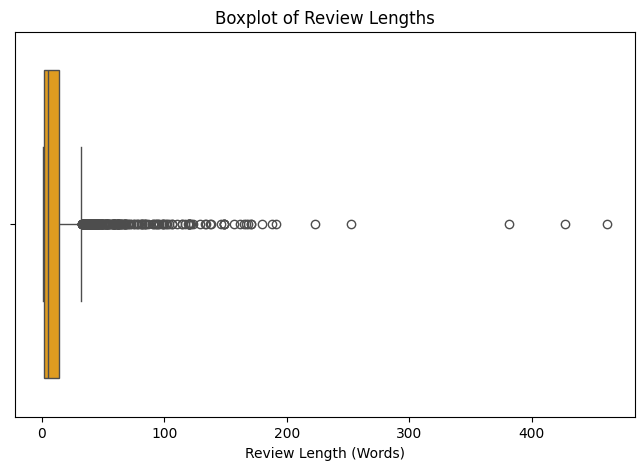


Review Length Statistics:
 count    2966.000000
mean       12.818274
std        24.748400
min         1.000000
25%         2.000000
50%         5.000000
75%        14.000000
max       461.000000
Name: review_length, dtype: float64

Total Duplicate Reviews: 0


<ipython-input-1-bfb4edc857ed>:93: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_hashable = df[hashable_columns].applymap(lambda x: str(x) if isinstance(x, (list, dict)) else x)


In [1]:
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

# Load dataset
file_path = "Gift_Cards_5.json"
try:
    df = pd.read_json(file_path, lines=True)  # Use lines=True for JSONL format
except ValueError as e:
    print(f"Error reading JSON file: {e}")
    exit()



# (a) Counts & Averages
num_reviews = len(df)
num_products = df['asin'].nunique()
num_users = df['reviewerID'].nunique()
avg_rating = df['overall'].mean()

summary_stats = pd.DataFrame({
    "Metric": ["Total Reviews", "Unique Products", "Unique Users", "Average Rating"],
    "Value": [num_reviews, num_products, num_users, avg_rating]
})
print(summary_stats)

# (b) Distribution of Number of Reviews Across Products
plt.figure(figsize=(8,5))
sns.histplot(df['asin'].value_counts(), bins=30, kde=True, color='blue')
plt.title("Distribution of Reviews Across Products")
plt.xlabel("Number of Reviews per Product")
plt.ylabel("Frequency")
plt.show()



# (c) Distribution of Number of Reviews Per Product
product_review_counts = df['asin'].value_counts()

plt.figure(figsize=(8,5))
sns.boxplot(x=product_review_counts, color='purple')
plt.title("Boxplot of Reviews per Product")
plt.xlabel("Number of Reviews per Product")
plt.show()

plt.figure(figsize=(1,1))
plt.show()

# (d) Distribution of Reviews Per User
user_review_counts = df['reviewerID'].value_counts()

plt.figure(figsize=(8,5))
sns.histplot(user_review_counts, bins=50, kde=True, color='red')
plt.title("Distribution of Reviews per User")
plt.xlabel("Reviews per User")
plt.ylabel("Count")
plt.xlim([0, 100])
plt.show()



#(e) Review Lengths & Outliers
df['review_length'] = df['reviewText'].dropna().apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=30, kde=True, color='green')
plt.title("Review Length Distribution")
plt.xlabel("Number of Words in Review")
plt.ylabel("Count")
plt.show()



# Boxplot for review length (detecting outliers)
plt.figure(figsize=(8,5))
sns.boxplot(x=df['review_length'], color='orange')
plt.title("Boxplot of Review Lengths")
plt.xlabel("Review Length (Words)")
plt.show()



# (f) Analyze Lengths
length_stats = df['review_length'].describe()
print("\nReview Length Statistics:\n", length_stats)

# (g) Check for Duplicates
hashable_columns = df.select_dtypes(include=['number', 'bool', 'object']).columns
df_hashable = df[hashable_columns].applymap(lambda x: str(x) if isinstance(x, (list, dict)) else x)
duplicate_reviews = df_hashable.duplicated().sum()
print(f"\nTotal Duplicate Reviews: {duplicate_reviews}")



sentiment
Positive    2906
Negative      33
Neutral       33
Name: count, dtype: int64


<ipython-input-3-9154d94a7f31>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sentiment"], palette=["red", "gray", "green"], order=["Negative", "Neutral", "Positive"])


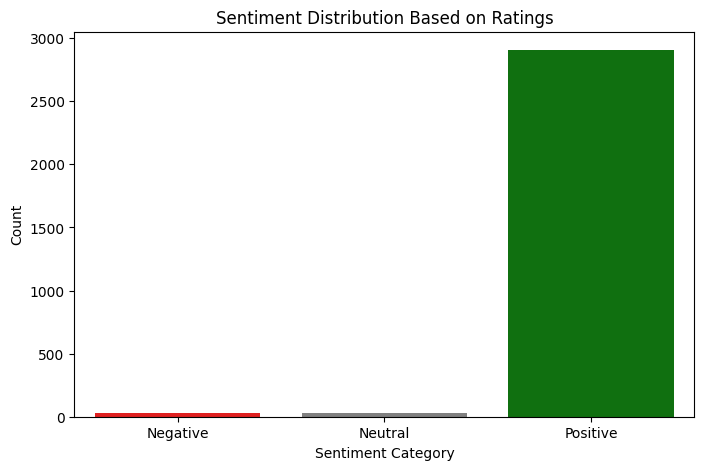

<ipython-input-3-9154d94a7f31>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['verified'], y=df['overall'], palette='coolwarm')


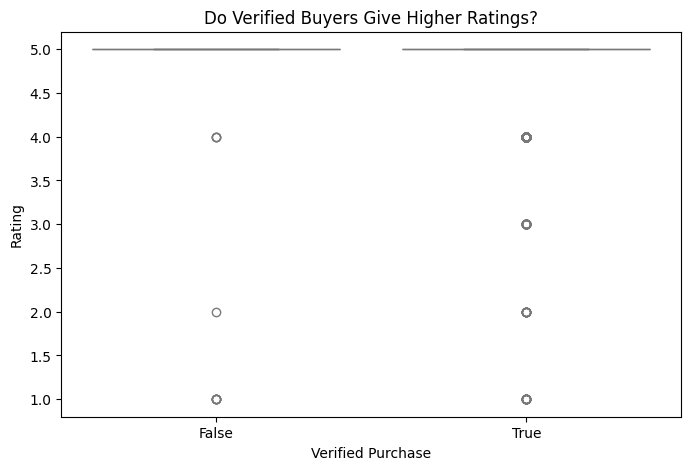

<Figure size 100x100 with 0 Axes>

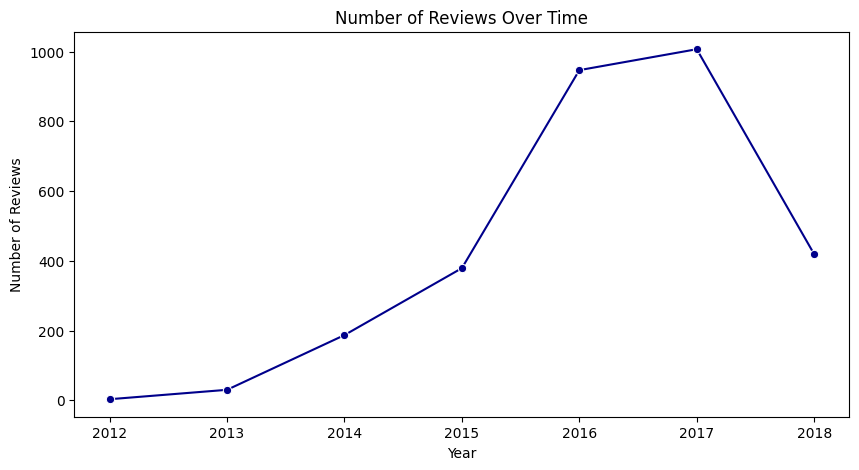

<Figure size 100x100 with 0 Axes>

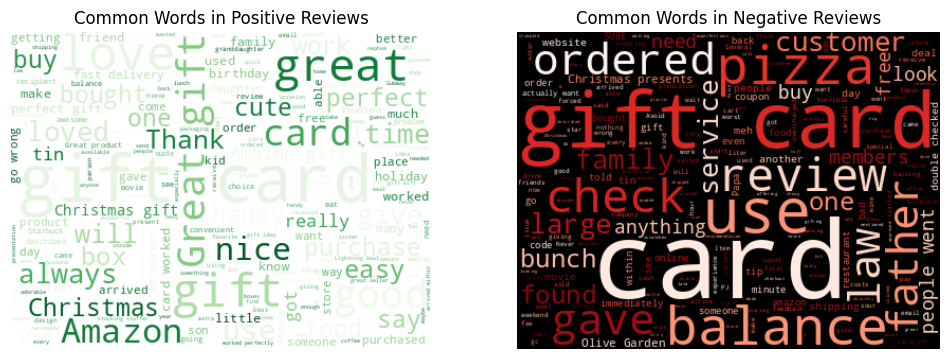

<Figure size 100x100 with 0 Axes>

<ipython-input-3-9154d94a7f31>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['year'], y=df['overall'], palette="viridis")


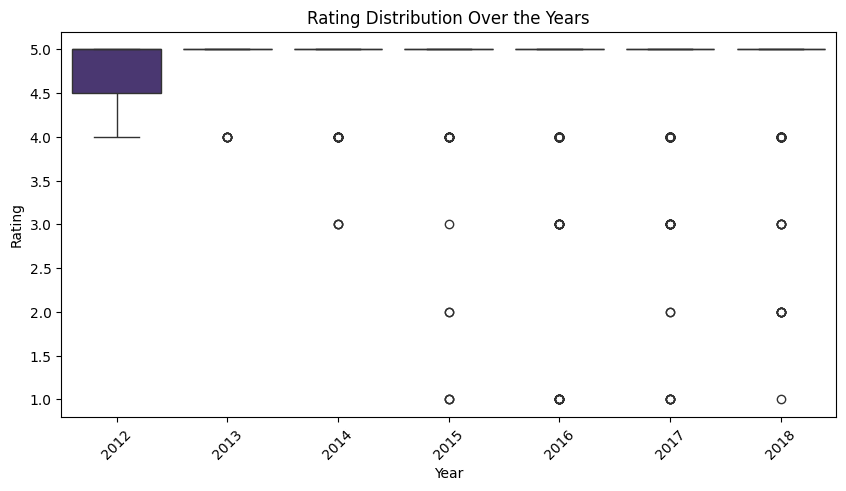

<Figure size 100x100 with 0 Axes>

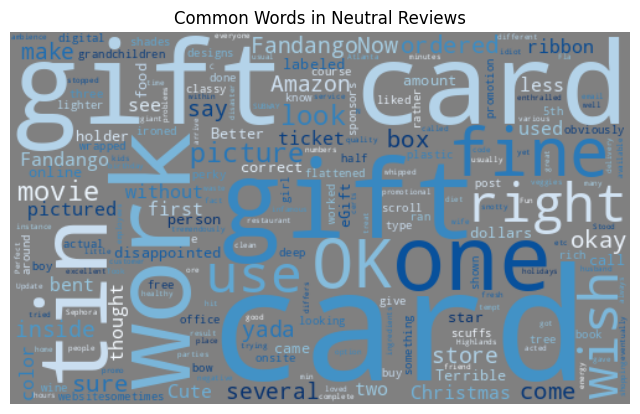

<Figure size 100x100 with 0 Axes>

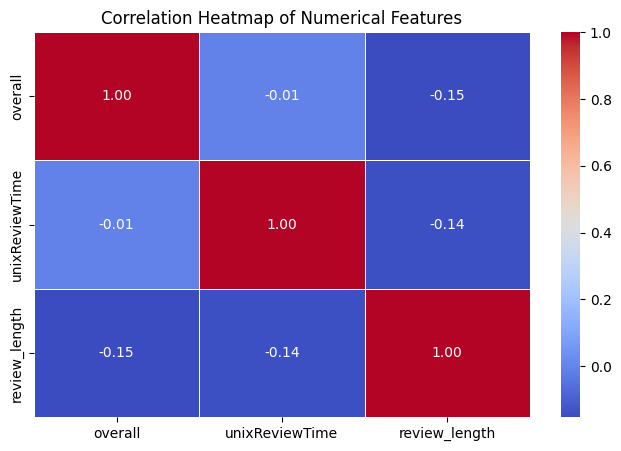

<Figure size 100x100 with 0 Axes>

In [3]:
#Pre-processing
#Lebaling sentiments on the base of Ratings
def label_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["overall"].apply(label_sentiment)



# Check label distribution
print(df["sentiment"].value_counts())



# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=df["sentiment"], palette=["red", "gray", "green"], order=["Negative", "Neutral", "Positive"])
plt.title("Sentiment Distribution Based on Ratings")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()



# Verified vs. Unverified Reviews
plt.figure(figsize=(8,5))
sns.boxplot(x=df['verified'], y=df['overall'], palette='coolwarm')
plt.title("Do Verified Buyers Give Higher Ratings?")
plt.xlabel("Verified Purchase")
plt.ylabel("Rating")
plt.show()

plt.figure(figsize=(1,1))
plt.show()

# Review Trends Over Time
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['reviewTime'].dt.year
reviews_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, marker='o', color='darkblue')
plt.title("Number of Reviews Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

plt.figure(figsize=(1,1))
plt.show()

# Word Cloud for Most Common Words in Positive and Negative Reviews
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['reviewText'].dropna())
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['reviewText'].dropna())

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
wordcloud_pos = WordCloud(width=400, height=300, background_color='white', colormap='Greens').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Positive Reviews")

plt.subplot(1,2,2)
wordcloud_neg = WordCloud(width=400, height=300, background_color='black', colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Negative Reviews")

plt.show()




plt.figure(figsize=(1,1))
plt.show()

# Rating Distribution by Year
plt.figure(figsize=(10,5))
sns.boxplot(x=df['year'], y=df['overall'], palette="viridis")
plt.title("Rating Distribution Over the Years")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(1,1))
plt.show()

# Word Cloud for Neutral Reviews
neutral_reviews = " ".join(df[df['overall'] == 3]['reviewText'].dropna())

plt.figure(figsize=(8,6))
wordcloud_neutral = WordCloud(width=500, height=300, background_color='gray', colormap='Blues').generate(neutral_reviews)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Neutral Reviews")
plt.show()

plt.figure(figsize=(1,1))
plt.show()

# Correlation Heatmap
df_numeric = df[['overall', 'unixReviewTime']].copy()
df_numeric['review_length'] = df['reviewText'].dropna().apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

plt.figure(figsize=(1,1))
plt.show()

# Monthly Trends in Reviews
df['month'] = df['reviewTime'].dt.to_period("M")
monthly_reviews = df.groupby(df['month']).size()



In [4]:
# Select relevant columns
df_selected = df[['reviewText', 'overall', 'sentiment', 'verified']]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Display the first few rows
print(df_selected.head())

                                         reviewText  overall sentiment  \
0                               Another great gift.        5  Positive   
1                         Gift card for my daughter        4  Positive   
2                                      Nice present        5  Positive   
3  My niece loved this birthday greeting/gift card.        5  Positive   
4                                   fine as a gift.        5  Positive   

   verified  
0      True  
1      True  
2      True  
3      True  
4      True  


count    2966.000000
mean       12.818274
std        24.748400
min         1.000000
25%         2.000000
50%         5.000000
75%        14.000000
max       461.000000
Name: review_length, dtype: float64


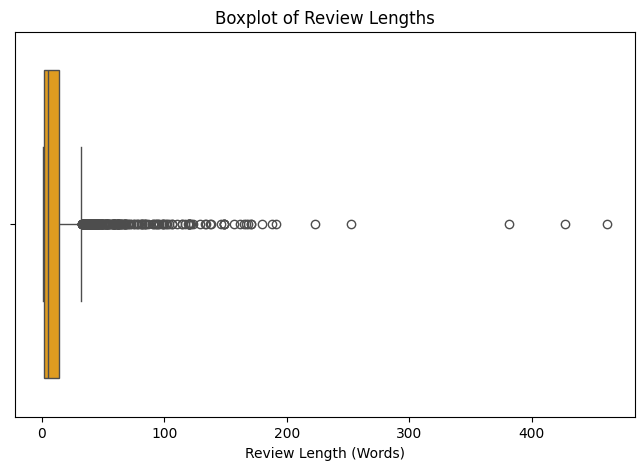

Number of reviews after removing outliers: 2818


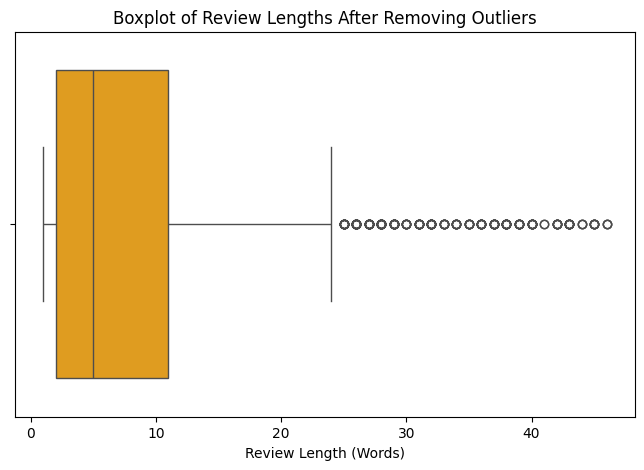

In [5]:
# Checking for outliers
import numpy as np

# Review Length Analysis
df_selected["review_length"] = df_selected["reviewText"].apply(lambda x: len(x.split()))

# Display summary stats
print(df_selected["review_length"].describe())

# Boxplot to detect outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df_selected["review_length"], color="orange")
plt.title("Boxplot of Review Lengths")
plt.xlabel("Review Length (Words)")
plt.show()

# Define Outlier Threshold (e.g., greater than 95th percentile)
outlier_threshold = np.percentile(df_selected["review_length"], 95)
df_no_outliers = df_selected[df_selected["review_length"] <= outlier_threshold]

print(f"Number of reviews after removing outliers: {len(df_no_outliers)}")


# Create a boxplot of review lengths after removing outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_outliers["review_length"], color="orange")
plt.title("Boxplot of Review Lengths After Removing Outliers")
plt.xlabel("Review Length (Words)")
plt.show()

In [6]:
import nltk

nltk.download("stopwords")
nltk.download("punkt")  # This is required for word_tokenize()
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download("stopwords")
nltk.download("punkt")

# Function to clean text
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = word_tokenize(text)  # Tokenize (keeps punctuation)
    words = [word for word in words if word not in stopwords.words("english")]  # Remove stopwords (case-sensitive)
    return " ".join(words)

df_no_outliers["cleaned_text"] = df_no_outliers["reviewText"].apply(preprocess_text)
print(df_no_outliers[["reviewText", "cleaned_text"]].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                         reviewText  \
0                               Another great gift.   
1                         Gift card for my daughter   
2                                      Nice present   
3  My niece loved this birthday greeting/gift card.   
4                                   fine as a gift.   

                                   cleaned_text  
0                          Another great gift .  
1                            Gift card daughter  
2                                  Nice present  
3  My niece loved birthday greeting/gift card .  
4                                   fine gift .  


<ipython-input-7-48addeeab4bf>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["cleaned_text"] = df_no_outliers["reviewText"].apply(preprocess_text)


In [8]:
!pip install textblob

<ipython-input-10-68aedbab894c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Rating_Sentiment"] = df_no_outliers["overall"].apply(label_sentiment)
<ipython-input-10-68aedbab894c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["TextBlob_Sentiment"] = df_no_outliers["cleaned_text"].apply(textblob_sentiment)
<ipython-input-10-68aedbab894c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

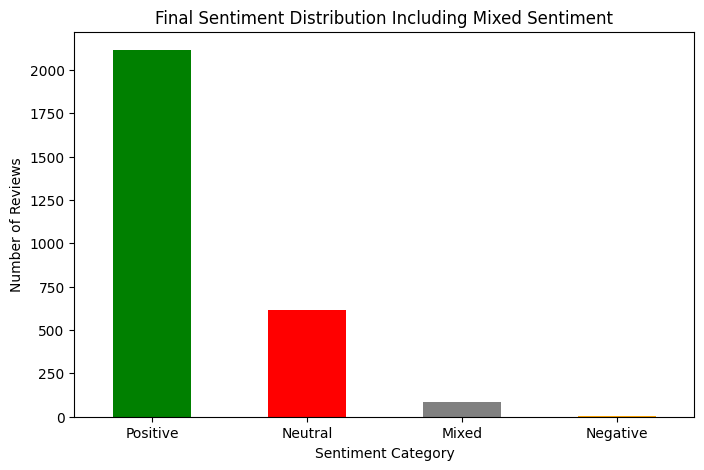

,overall,Rating_Sentiment,TextBlob_Sentiment,Final_Sentiment
0,5,Positive,Positive,Positive
1,4,Positive,Neutral,Neutral
2,5,Positive,Positive,Positive
3,5,Positive,Positive,Positive
4,5,Positive,Positive,Positive
...,...,...,...,...
99,4,Positive,Positive,Positive
100,5,Positive,Negative,Mixed
101,5,Positive,Neutral,Neutral
102,5,Positive,Neutral,Neutral


In [10]:
from wordcloud import WordCloud
from textblob import TextBlob
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display



#Function to classify sentiment using TextBlob
def textblob_sentiment(text):
    if not isinstance(text, str):  #
        return "Neutral"
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

#sentiment classification based on rating
df_no_outliers["Rating_Sentiment"] = df_no_outliers["overall"].apply(label_sentiment)

# Apply TextBlob sentiment analysis
df_no_outliers["TextBlob_Sentiment"] = df_no_outliers["cleaned_text"].apply(textblob_sentiment)

#detect mixed sentiment cases
def detect_mixed_sentiment(row):
    if row["Rating_Sentiment"] == "Positive" and row["TextBlob_Sentiment"] == "Negative":
        return "Mixed (Positive Rating, Negative Review)"
    elif row["Rating_Sentiment"] == "Negative" and row["TextBlob_Sentiment"] == "Positive":
        return "Mixed (Negative Rating, Positive Review)"
    else:
        return "Consistent"

#mixed sentiment detection
df_no_outliers["Mixed_Sentiment"] = df_no_outliers.apply(detect_mixed_sentiment, axis=1)

#final sentiment category
def categorize_sentiment(row):
    if row["Mixed_Sentiment"].startswith("Mixed"):
        return "Mixed"
    else:
        return row["TextBlob_Sentiment"]  # Use TextBlob sentiment if not mixed

df_no_outliers["Final_Sentiment"] = df_no_outliers.apply(categorize_sentiment, axis=1)

# Count occurrences of each sentiment category
sentiment_counts = df_no_outliers["Final_Sentiment"].value_counts()

#sentiment distribution including Mixed category
plt.figure(figsize=(8,5))
sentiment_counts.plot(kind="bar", color=["green", "red", "gray", "orange"])
plt.title("Final Sentiment Distribution Including Mixed Sentiment")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

display(df_no_outliers[["overall", "Rating_Sentiment", "TextBlob_Sentiment", "Final_Sentiment"]].head(100))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-11-08022e5e9789>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["VADER_Sentiment"] = df_no_outliers["cleaned_text"].apply(vader_sentiment)
<ipython-input-11-08022e5e9789>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Rating_Sentiment"] = df_no_outliers["overall"].apply(lambda x: "Positive" if x >= 4 else "Neutral" if x == 3 else "Negative")
<ipython-input-11-08022e5e9789>:40: SettingWithC

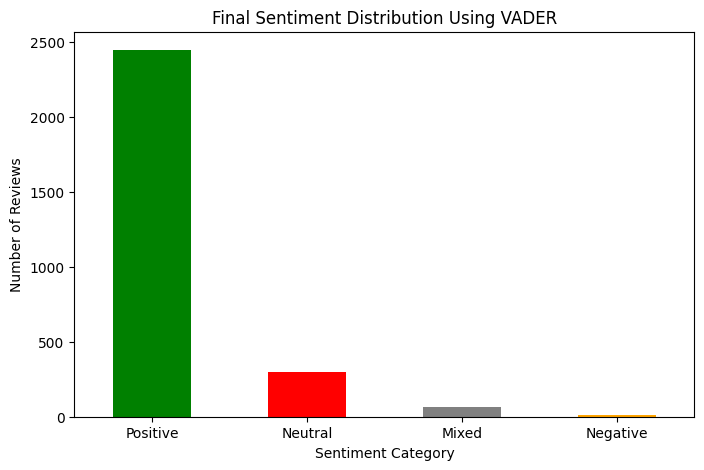

,overall,Rating_Sentiment,VADER_Sentiment,Final_Sentiment
0,5,Positive,Positive,Positive
1,4,Positive,Positive,Positive
2,5,Positive,Positive,Positive
3,5,Positive,Positive,Positive
4,5,Positive,Positive,Positive


In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

nltk.download("vader_lexicon")

#Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

#classify sentiment using VADER
def vader_sentiment(text):
    if not isinstance(text, str):  # Handle missing values
        return "Neutral"
    scores = sia.polarity_scores(text)
    compound = scores["compound"]  # VADER’s main sentiment score
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

#VADER sentiment analysis to reviews
df_no_outliers["VADER_Sentiment"] = df_no_outliers["cleaned_text"].apply(vader_sentiment)

#Rating-based Sentiment vs. VADER Sentiment
df_no_outliers["Rating_Sentiment"] = df_no_outliers["overall"].apply(lambda x: "Positive" if x >= 4 else "Neutral" if x == 3 else "Negative")

# Detect mixed sentiment
def detect_mixed_sentiment_vader(row):
    if row["Rating_Sentiment"] == "Positive" and row["VADER_Sentiment"] == "Negative":
        return "Mixed"
    elif row["Rating_Sentiment"] == "Negative" and row["VADER_Sentiment"] == "Positive":
        return "Mixed"
    else:
        return row["VADER_Sentiment"]

df_no_outliers["Final_Sentiment"] = df_no_outliers.apply(detect_mixed_sentiment_vader, axis=1)

#occurrences of each sentiment category
sentiment_counts = df_no_outliers["Final_Sentiment"].value_counts()

#sentiment distribution
plt.figure(figsize=(8,5))
sentiment_counts.plot(kind="bar", color=["green", "red", "gray", "orange"])
plt.title("Final Sentiment Distribution Using VADER")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

# Display the updated DataFrame with VADER Sentiment
display(df_no_outliers[["overall", "Rating_Sentiment", "VADER_Sentiment", "Final_Sentiment"]].head())
